# <center><font color=green>Avocado Prices</font> - Exploratory Data Analysis and Forecasting</center>

## Import all Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale,normalize,Imputer,LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

## Load the avocado dataset

In [2]:
df = pd.read_csv('/Users/omkarmutreja/Downloads/avocado.csv')
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 13)

In [4]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


## Data Preprocessing

In [5]:
df.info() # There are no NA values or missing values in the dataset
# However, the first column(Unnamed:0) is a sequence of numbers and not required
# Changing some of the columns names as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [6]:
#df.drop('Unnamed: 0', axis=1, inplace=True)
df.rename(columns={'4046': 'small hass', '4225': 'large hass','4770':'extra large hass'}, inplace=True)

In [7]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'small hass', 'large hass',
       'extra large hass', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

## Time Series plot of Average Price across all regions

In [8]:
df['Date']=pd.to_datetime(df['Date'], format="%m/%d/%y")
dateMean = df.groupby('Date').mean()
scatter = go.Scatter(x=dateMean.AveragePrice.index, y=dateMean.AveragePrice)
data = [scatter]
layout=go.Layout(title="Time Series Plot of Average Price across all regions", xaxis={'title':'Date'}, yaxis={'title':'Average Price'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

## Time Series plot of Average Price for Conventional and Organic Type

In [9]:
conventional = df[df.type=="conventional"]
organic = df[df.type=="organic"]

con_date = conventional.groupby('Date').mean()
scatter1 = go.Scatter(x=con_date.AveragePrice.index, y=con_date.AveragePrice, name="Conventional")

org_date = organic.groupby('Date').mean()
scatter2 = go.Scatter(x=org_date.AveragePrice.index, y=org_date.AveragePrice, name="Organic")

data = [scatter1, scatter2]
layout=go.Layout(title="Time Series Plot of Average Price for Conventional and Organic Type", xaxis={'title':'Date'}, yaxis={'title':'Average Price'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

## Creating Two Arrays: One having dependent variable i.e. Average Price and other having remaining variables

In [10]:
ml_df = df.copy()
X = ml_df.drop('AveragePrice',1)
y = ml_df.AveragePrice
X = X[:-1].reset_index(drop=True)
y = y[1:].reset_index(drop=True)


ml_df = pd.concat([X,y], 1)
ml_df =  ml_df.groupby('Date').mean()

ml_df.dtypes

Total Volume        float64
small hass          float64
large hass          float64
extra large hass    float64
Total Bags          float64
Small Bags          float64
Large Bags          float64
XLarge Bags         float64
year                  int64
AveragePrice        float64
dtype: object

## Exploratory Analysis

### Correlation among variables

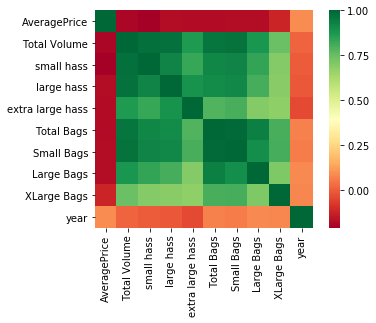

In [11]:
sns.heatmap(df.corr(),square=True,cmap='RdYlGn')

In [12]:
core = df.corr()
c1 = core.abs().unstack()
c1 = c1[c1.between(0.5, 0.98, inclusive=False)]
c1.sort_values(ascending = False).drop_duplicates()

Total Volume      small hass          0.977863
                  large hass          0.974181
                  Small Bags          0.967238
                  Total Bags          0.963047
Large Bags        Total Bags          0.943009
small hass        large hass          0.926110
Small Bags        small hass          0.925280
Total Bags        small hass          0.920057
large hass        Small Bags          0.916031
Total Bags        large hass          0.905787
Small Bags        Large Bags          0.902589
extra large hass  large hass          0.887855
Large Bags        Total Volume        0.880640
Total Volume      extra large hass    0.872202
Large Bags        small hass          0.838645
small hass        extra large hass    0.833389
Large Bags        large hass          0.810015
Small Bags        XLarge Bags         0.806845
XLarge Bags       Total Bags          0.804233
Small Bags        extra large hass    0.802733
extra large hass  Total Bags          0.792314
XLarge Bags  

#### No surprises as all the above variables are suppose to be strongly correlated

In [13]:
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

### Max and Min Average price of Avocado for each region every year

In [14]:
df_pivot = pd.pivot_table(df,values='AveragePrice',index='region',columns='year',aggfunc=np.mean)

df_pivot = df_pivot.sort_values(by=2015)

max_region_2015 = df_pivot[2015].nlargest(1)
min_region_2015 = df_pivot[2015].nsmallest(1)

max_region_2016 = df_pivot[2016].nlargest(1)
min_region_2016 = df_pivot[2016].nsmallest(1)

max_region_2017 = df_pivot[2017].nlargest(1)
min_region_2017 = df_pivot[2017].nsmallest(1)

max_region_2018 = df_pivot[2018].nlargest(1)
min_region_2018 = df_pivot[2018].nsmallest(1)

max_avg_price_df = [max_region_2015,max_region_2016,max_region_2017,max_region_2018]
print('Max Avg Price:')
print(max_avg_price_df)
print("")
print("")

min_avg_price_df = [min_region_2015,min_region_2016,min_region_2017,min_region_2018]
print('Min Avg Price:')
print(min_avg_price_df)




Max Avg Price:
[region
HartfordSpringfield    1.747788
Name: 2015, dtype: float64, region
SanFrancisco    1.88125
Name: 2016, dtype: float64, region
SanFrancisco    1.965943
Name: 2017, dtype: float64, region
HartfordSpringfield    1.6775
Name: 2018, dtype: float64]


Min Avg Price:
[region
Houston    1.048077
Name: 2015, dtype: float64, region
Houston    0.991923
Name: 2016, dtype: float64, region
Houston    1.104057
Name: 2017, dtype: float64, region
Houston    1.042083
Name: 2018, dtype: float64]


#### HartfordSpringfield and SanFrancisco are the top 2 regions having max average price of avocado whereas Houston has the lowest avg price of avocado

## Average Price of  Avocado for each region

Text(0.5,1,'Average Price of Avocado According to Region')

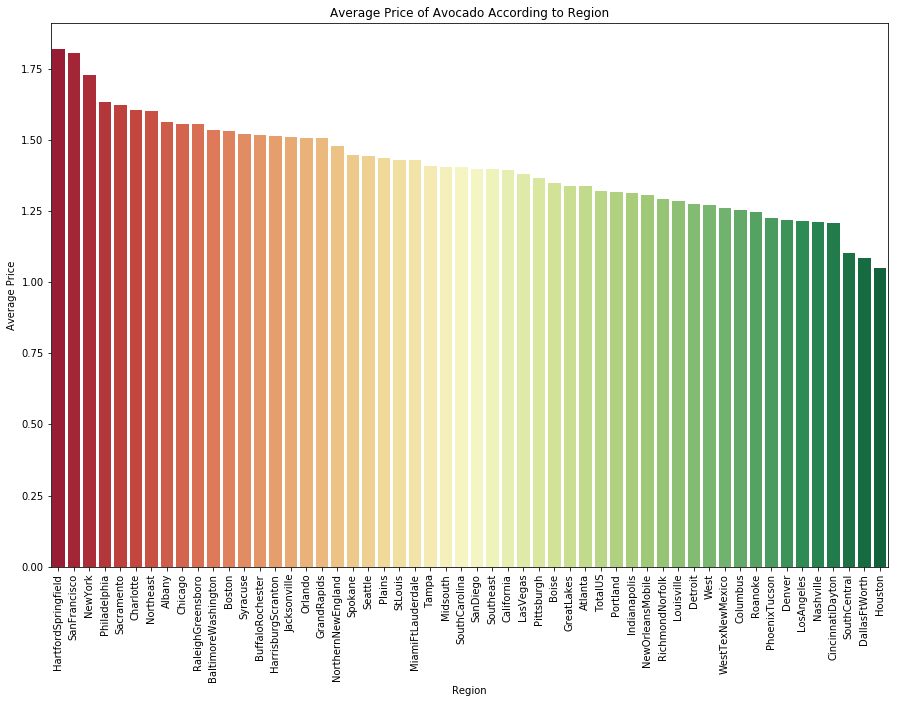

In [15]:
unique_regions=list(df.region.unique())
average_price=[]

for i in unique_regions:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'unique_regions':unique_regions,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(15,10))
ax=sns.barplot(x=sorted_data.unique_regions,y=sorted_data.average_price,palette='RdYlGn')

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

## Average Volume of  Avocado for each region

Text(0.5,1,'Average of Total Volume According to Region')

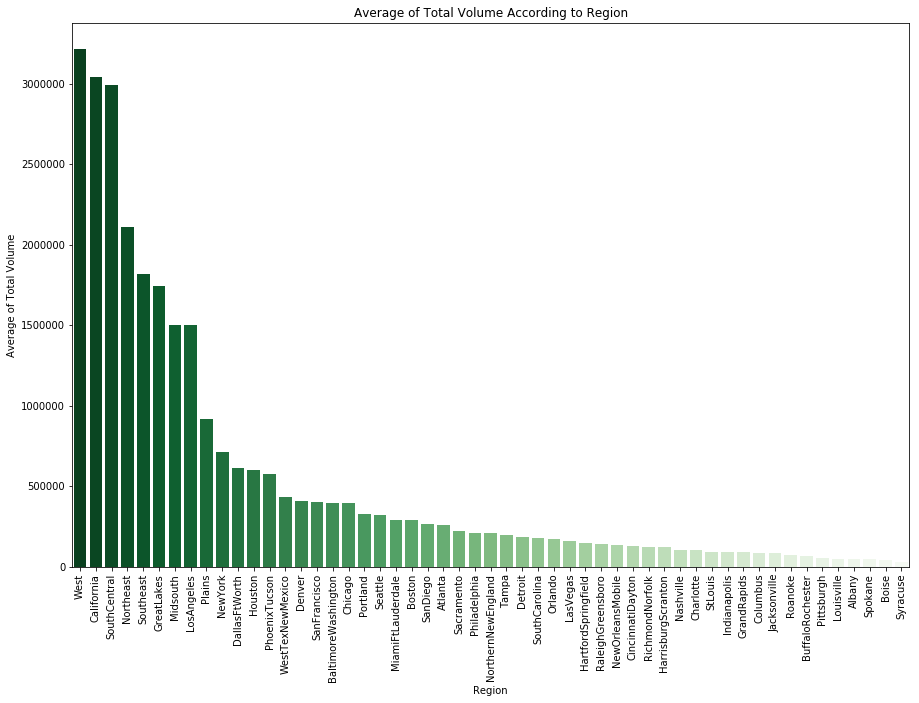

In [16]:
f1=df.region!='TotalUS'
data1=df[f1]

unique_regions=list(data1.region.unique())
average_total_volume=[]

for i in unique_regions:
    x=data1[data1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'unique_regions':unique_regions,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(15,10))
ax=sns.barplot(x=sorted_data1.unique_regions,y=sorted_data1.average_total_volume,palette='Greens_r')

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

### Average price of Avocado between 2015 to 2018
### Average price is between 1 and 1.5

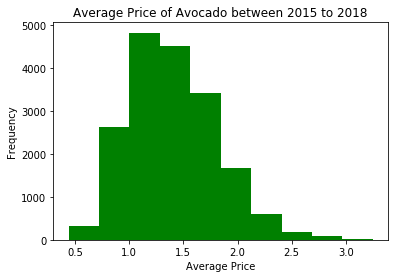

In [17]:
plt.hist(df.AveragePrice,color='green')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.title('Average Price of Avocado between 2015 to 2018')
plt.show()
# Average price of Avocado is

### 3.4 Relation between Total Volume and Hass
### As Volume increases, quantity of hass increases and Average Price tends to go down

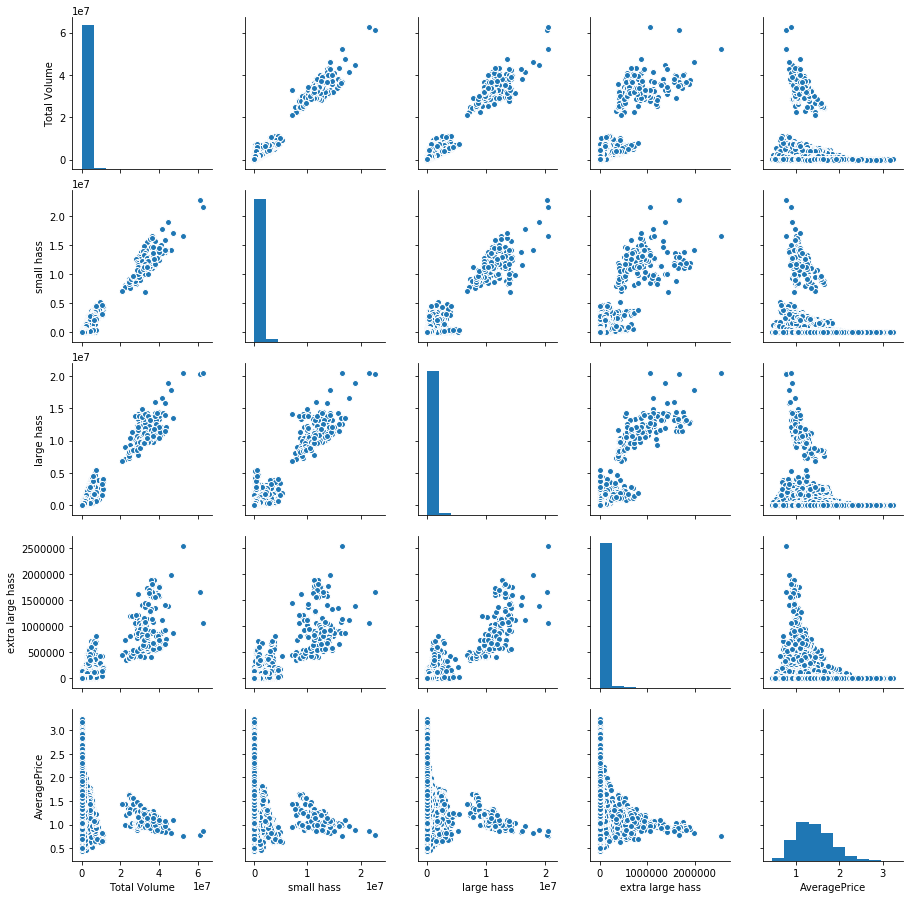

In [18]:
sns.pairplot(df[['Total Volume','small hass','large hass','extra large hass','AveragePrice']])

## 4. Forecasting Average Price

## Linear Regression - To predict Average Price of Avocado

In [19]:
# Multiple Linear Regression formula : Y = b0X0 + b1X1 + b2X2 + ... + bnXn where X0=1

# Creating feature and target variables
X = ml_df.drop('AveragePrice',1)
y = ml_df.AveragePrice

# Splitting the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10, shuffle=False)

reg_all = LinearRegression()
reg_all.fit(X_train,y_train)
y_pred = reg_all.predict(X_test)
print('Linear Regression', (np.sqrt(mean_squared_error(y_test, y_pred))))

new_frame = y_test.copy()
new_frame['Predictions'] = y_pred

scatter1 = go.Scatter(x=ml_df.index, y=ml_df['AveragePrice'], name="Actual")

scatter2 = go.Scatter(x=new_frame.index, y=new_frame['Predictions'], name="Predictions")

data = [scatter1, scatter2]
layout=go.Layout(title="Prediction vs Actual Test Points", xaxis={'title':'Date'}, yaxis={'title':'Average Price'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)


Linear Regression 0.19349290989906368


## Other Machine Learning Models

In [20]:
classifiers = [['DecisionTree :',DecisionTreeRegressor()],
               ['RandomForest :',RandomForestRegressor(n_estimators=100)],
               ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
               ['SVM :', SVR()],
               ['Lasso: ', Lasso()],
               ['Ridge: ', Ridge()],
               ['BayesianRidge: ', BayesianRidge()],
               ['ElasticNet: ', ElasticNet()]]

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

DecisionTree : 0.2046611058185531
RandomForest : 0.1452225085016477
KNeighbours : 0.1400816587063824
SVM : 0.08549754816938224
Lasso:  0.12334650618046453
Ridge:  0.18743197534269615
BayesianRidge:  0.16472748329894343
ElasticNet:  0.12343663352574868


## Lasso regression seems to have the lowest error

In [21]:
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
print('Lasso Regression', (np.sqrt(mean_squared_error(y_test, y_pred))))

new_frame = y_test.copy()
new_frame['Predictions'] = y_pred

scatter1 = go.Scatter(x=ml_df.index, y=ml_df['AveragePrice'], name="Actual")

scatter2 = go.Scatter(x=new_frame.index, y=new_frame['Predictions'], name="Predictions")

data = [scatter1, scatter2]
layout=go.Layout(title="Prediction vs Actual Test Points", xaxis={'title':'Date'}, yaxis={'title':'Average Price'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

Lasso Regression 0.12334650618046453
